<a href="https://colab.research.google.com/github/HarshaliD/Deep-Learning/blob/main/ImageClassificationUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using CNN
What is CNN?

A **Convolutional Neural Network (CNN)** is a type of deep learning algorithm that is particularly well-suited for image recognition and processing tasks. It is made up of multiple layers, including convolutional layers, pooling layers, and fully connected layers.

In this notebook , 2 examples for application of CNN are showed.

*First,*
CNN is applied on **CIFAR10 Dataset.**
*Second,*
CNN is applied on **MNIST dataset**

# CIFAR10 Dataset
[Link to Dataset](https://www.cs.toronto.edu/~kriz/cifar.html])

Dataset has following features:


1.   It has 60000 32*32 color images in 10 classes.
2.   
50000 training images and 10000 testing images
3.3 RGB Channel



**Matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. plt is a commonly used alias for the pyplot module, which provides a MATLAB-like interface for plotting.

**TensorFlow**: TensorFlow is an open-source machine learning library developed by the Google Brain team. It provides a comprehensive set of tools for building and deploying machine learning models. TensorFlow supports both deep learning and traditional machine learning.

**Keras**: Keras is a high-level neural networks API written in Python that runs on top of various lower-level deep learning libraries, including TensorFlow. TensorFlow 2.x integrates Keras as its official high-level API.

**Datasets**: The datasets module in Keras provides a collection of commonly used datasets for training and testing machine learning models. This includes datasets like MNIST, CIFAR-10, and more.

**Layers**: The layers module in Keras includes a variety of pre-built layers that you can use to construct your neural network architectures. This includes dense layers, convolutional layers, recurrent layers, etc.

**Models**: The models module in Keras provides a way to define and compile neural network models. It includes functions to create common architectures like Sequential models and more complex functional API-based models.

**NumPy**: NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these elements. NumPy is often used for data manipulation and preprocessing in machine learning.

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np


Splitting a dataset into training and testing sets.

**X_train** typically represents the features or input data used for training a machine learning model.

**y_train** represents the corresponding labels or target values associated with the training data.

**X_test** represents the features or input data for testing the model.

**y_test** represents the corresponding labels or target values associated with the testing data.


In [5]:
(X_train,y_train),(X_test,y_test)= datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0]        #3d array

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train[:5]  #2d

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)        #reshape can be used for flattening
y_train[:5]                           #1d

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
classes[6]

'frog'

In [12]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

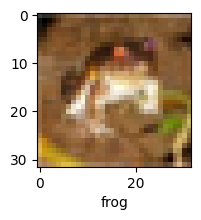

In [13]:
plot_sample(X_train,y_train,0)

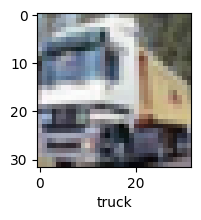

In [14]:
plot_sample(X_train,y_train,1)

**Normalization**

Normalization is a data preprocessing technique used to adjust the values of features in a dataset to a common scale.

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [15]:
#normalization i.e 0-1 range

X_train=X_train/255
X_test=X_test/255

**ANN (Artificial Neural Network)**

ANNs typically have an input layer, one or more hidden layers, and an output layer. Information flows from the input layer through the hidden layers to produce an output.

Weights and Activation Functions: Each connection between nodes has a weight, and each node applies an activation function to the weighted sum of its inputs. This introduces non-linearity, enabling the network to learn complex patterns.

Learning: ANNs learn from data by adjusting the weights during a training process. This involves using a loss function to measure the difference between predicted and actual outputs and optimizing the weights to minimize this difference.

First, let's build a ANN.Later, we can see the difference of performane of ANN and CNN.

In [16]:
#ANN
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 146s 93ms/step - loss: 1.8146 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 184s 118ms/step - loss: 1.6291 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 176s 113ms/step - loss: 1.5448 - accuracy: 0.4554
Epoch 4/5
1563/1563 [==============================] - 164s 105ms/step - loss: 1.4856 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 163s 105ms/step - loss: 1.4356 - accuracy: 0.4935


**models.Sequential**: This creates a sequential neural network model, which is a linear stack of layers.

**layers.Flatten**: This layer is used to flatten the input. In this case, it's used as the input layer to flatten the 32x32x3 image data to a 1D array.

**layers.Dense**: These are fully connected layers, where each neuron is connected to every neuron in the previous layer.

**ReLU (Rectified Linear Unit)**:

Function: ReLU is an activation function commonly used in neural networks.It returns the input for positive values and zero for negative values. It introduces non-linearity and helps networks learn complex patterns.

Mathematical Definition:
f(x)=max(0,x)

**Sigmoid:**

Function: Sigmoid is another activation function used in neural networks.It squashes input values between 0 and 1, making it suitable for binary classification problems. It's often used in the output layer for binary classification tasks, providing probabilities that sum to 1.

Mathematical Definition:
f(x)=
1/(1+e**(−x))

**ann.compile**: Configures the model for training.

**optimizer='SGD'**: Stochastic Gradient Descent is used as the optimizer for updating the model's weights during training.

**loss='sparse_categorical_crossentropy':**This is the loss function used for training the model. It is commonly used for multi-class classification tasks.

**metrics=['accuracy']**: Monitors the accuracy during training.

**epochs=5**: Specifies the number of times the model should iterate over the entire training dataset during training.

**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report for ANN: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 31ms/step
Classification Report for ANN: 
               precision    recall  f1-score   support

           0       0.54      0.55      0.55      1000
           1       0.57      0.65      0.61      1000
           2       0.35      0.32      0.33      1000
           3       0.39      0.28      0.33      1000
           4       0.32      0.59      0.42      1000
           5       0.48      0.30      0.37      1000
           6       0.54      0.49      0.51      1000
           7       0.63      0.45      0.53      1000
           8       0.69      0.50      0.58      1000
           9       0.46      0.65      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



**CNN (Convolutional Neural Network)**

Now, lets bulid a CNN using the ANN we created before.

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

**Convolutional Layers (Conv2D)**:

`layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))`:

This is the first convolutional layer with 32 filters (output channels), each using a 3x3 kernel.A 3x3 kernel refers to a convolutional filter with a size of 3 pixels by 3 pixels.

The activation function is ReLU (Rectified Linear Unit), introducing non-linearity.

`input_shape=(32, 32, 3)` specifies the shape of the input data (32x32 images with 3 color channels).

`layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'):`

This is the second convolutional layer with 64 filters and a 3x3 kernel.
Again, ReLU is used as the activation function.

**Max Pooling Layers (MaxPooling2D)**:

`layers.MaxPooling2D((2, 2))`:
Max pooling is applied after each convolutional layer to reduce spatial dimensions.
The (2, 2) parameter specifies a 2x2 pooling window.

`layers.Dense(10, activation='softmax')`:

The final dense layer with 10 neurons, representing the output classes in a multi-class classification task.
Softmax activation is used to convert raw scores into probabilities, ensuring the output sums to 1.

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4475 - accuracy: 0.4809
Epoch 2/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.0852 - accuracy: 0.6212
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9550 - accuracy: 0.6665
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8669 - accuracy: 0.6990
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7969 - accuracy: 0.7240
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7353 - accuracy: 0.7441
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6873 - accuracy: 0.7598
Epoch 8/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.6411 - accuracy: 0.7768
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5989 - accuracy: 0.7897
Epoch 10/10
1563/1563 [==============================] - 63s 41m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9064 - accuracy: 0.7088


[0.9064202904701233, 0.7088000178337097]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 18ms/step


array([[1.9549205e-05, 2.6458965e-06, 1.9035646e-04, 8.8395584e-01,
        7.0050402e-05, 1.1539908e-01, 2.7448474e-04, 5.4893182e-05,
        3.2429256e-05, 5.1481231e-07],
       [4.1183704e-03, 1.5914467e-01, 4.4626809e-08, 1.7244001e-06,
        5.8585808e-08, 1.3021676e-07, 1.3614822e-08, 3.6961640e-09,
        8.3631849e-01, 4.1652122e-04],
       [1.8044288e-01, 1.8403909e-01, 5.8211433e-04, 6.6600274e-03,
        5.9702067e-04, 1.3909617e-03, 2.4645170e-04, 1.1268541e-03,
        6.1154681e-01, 1.3367754e-02],
       [8.5212535e-01, 1.2398274e-02, 6.8064849e-03, 1.6322654e-03,
        1.0080483e-03, 1.6022546e-04, 1.5175013e-05, 5.7509518e-05,
        1.2578465e-01, 1.1885904e-05],
       [8.1452534e-09, 2.3066480e-06, 6.6763004e-03, 7.9625333e-04,
        4.2444414e-01, 3.8788065e-05, 5.6802237e-01, 3.1744162e-06,
        1.6615993e-05, 1.2491378e-07]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 8, 0, 6]

In [24]:
y_test[:5]


array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

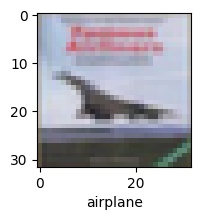

In [25]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test,3)

In [26]:
print("Classification Report for CNN: \n", classification_report(y_test, y_classes))

Classification Report for CNN: 
               precision    recall  f1-score   support

           0       0.79      0.69      0.74      1000
           1       0.79      0.86      0.82      1000
           2       0.64      0.58      0.61      1000
           3       0.51      0.51      0.51      1000
           4       0.68      0.65      0.67      1000
           5       0.56      0.68      0.61      1000
           6       0.77      0.80      0.79      1000
           7       0.75      0.77      0.76      1000
           8       0.84      0.77      0.80      1000
           9       0.80      0.78      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



# MNIST datase
Use CNN to do handwritten digits classification using MNIST dataset.
[Link to Dataset](https://www.tensorflow.org/datasets/catalog/mnist)




In [28]:
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [29]:
len(X_train)

60000

In [30]:
len(X_test)

10000

In [31]:
X_train[0].shape

(28, 28)

In [32]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [33]:
X_train = X_train/255
X_test = X_test/255


The -1 in the reshape command is a placeholder that automatically calculates the size of that dimension based on the other dimensions, ensuring that the total number of elements remains the same.

in shape (32, 28, 28, 1). This assumes grayscale images. If your images are RGB, you would use (32, 28, 28, 3).

In [38]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape                                                      #ask(-1,28,28,3)

(60000, 28, 28, 1)

In [39]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

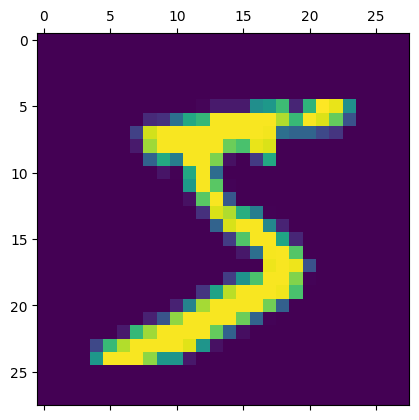

In [40]:
plt.matshow(X_train[0])

In [42]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

**What is Max Pooling?**

Max pooling is a down-sampling operation applied in CNNs after individual convolutional layers. It reduces the dimensionality of images by decreasing the number of pixels in the output from the previous convolutional layer.

Max Pooling Operation:
A defined filter size (e.g., 2x2) and stride (e.g., 2) are used for max pooling.
The convolutional output is divided into non-overlapping regions (pools), and the maximum value within each region is selected.
The selected max values form the output of the max pooling operation.

Max Pooling Examples:
The presenter uses an example with a 3x3 input and a 2x2 filter with a stride of 2.
The max pooling operation is applied, reducing the dimension of the input by a factor of 2.
The process involves sliding the filter over the input, selecting max values in each region.

Why Use Max Pooling?


1.   Reduction in Dimensionality:
Max pooling reduces the resolution of the output, enabling the network to analyze larger areas of the image and decreasing the number of parameters
2.   Computational Efficiency:
By reducing the resolution, max pooling reduces the computational load in subsequent layers.
3.   Overfitting Reduction:
Max pooling may help reduce overfitting by focusing on the most activated pixels and discarding less relevant details.

**When to use softmax and when to use sigmoid?**

If your problem is binary classification, use a single output node with sigmoid activation.
If your problem is multi-class classification, use multiple output nodes (one for each class) with softmax activation.

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 55s 28ms/step - loss: 0.0641 - accuracy: 0.9801
Epoch 2/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0367 - accuracy: 0.9883
Epoch 3/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0252 - accuracy: 0.9918
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0196 - accuracy: 0.9938
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0146 - accuracy: 0.9952


In [45]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 5s 14ms/step - loss: 0.0356 - accuracy: 0.9889


[0.03559353947639465, 0.9889000058174133]